# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer

In [2]:
from nltk.corpus import stopwords  
from nltk.stem.lancaster import LancasterStemmer  
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [3]:
from wordcloud import WordCloud, STOPWORDS

# Importing Dataset

In [4]:
data = pd.read_csv("app_info.csv")
data.head()

,name,title,minInstalls,score,ratings,reviews,size,androidVersion,genreId,released,updated,version,appId
0,WhiteHatJr,WhiteHat Jr: Book FREE Trial Class Now,1000000,3.723704,12682,6482,32M,5.0,EDUCATION,"Sep 11, 2020",1601010278,1.5.2,com.whitehatjr
1,Unacademy,Unacademy Learning App,10000000,4.194891,556461,192168,Varies with device,4.3,EDUCATION,"Feb 15, 2017",1602257855,5.27.1040,com.unacademyapp
2,WifiStudy,"wifistudy - #1 Exam Preparation, Free Mock Tests",1000000,4.309553,137081,61816,Varies with device,4.2,EDUCATION,"Dec 11, 2014",1599554732,Varies with device,com.wifistudy.onlinetest
3,KhanAcademy,Khan Academy,10000000,4.397173,133720,48253,Varies with device,Varies,EDUCATION,"Sep 22, 2015",1601414820,Varies with device,org.khanacademy.android
4,Byjus,BYJU'S – The Learning App,50000000,4.440033,1436720,672082,87M,5.0,EDUCATION,"Jul 6, 2015",1600688970,7.1.0.9005,com.byjus.thelearningapp


# Data Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11 non-null     object 
 1   title           11 non-null     object 
 2   minInstalls     11 non-null     int64  
 3   score           11 non-null     float64
 4   ratings         11 non-null     int64  
 5   reviews         11 non-null     int64  
 6   size            11 non-null     object 
 7   androidVersion  11 non-null     object 
 8   genreId         11 non-null     object 
 9   released        11 non-null     object 
 10  updated         11 non-null     int64  
 11  version         11 non-null     object 
 12  appId           11 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ KB


In [6]:
data.select_dtypes(include = ['object']).columns.values

array(['name', 'title', 'size', 'androidVersion', 'genreId', 'released',
       'version', 'appId'], dtype=object)

In [7]:
data.select_dtypes(include = ['int64', 'float64']).columns.values

array(['minInstalls', 'score', 'ratings', 'reviews', 'updated'],
      dtype=object)

In [8]:
data.genreId.unique()

array(['EDUCATION'], dtype=object)

In [9]:
data.androidVersion.unique()

array(['5.0', '4.3', '4.2', 'Varies', '6.0', '4.4'], dtype=object)

# Data Visualization

In [10]:
fig = px.bar(data, x="androidVersion", y="size", color='name', orientation='h')
py.iplot(fig, filename='bar')

In [11]:
fig = px.bar(data, x="released", y="size", color='name', orientation='h')
py.iplot(fig, filename='bar')

In [12]:
fig = px.bar(data, x="size", y="version", color='name', orientation='h')
py.iplot(fig, filename='bar')

In [13]:
fig = px.scatter(data, y='ratings', x='minInstalls', color='name', height=600, width=500)  
fig.update_traces(marker=dict(size=12, line=dict(width=2,color='DarkSlateGrey')), selector=dict(mode='markers'))
py.iplot(fig, filename='scatter')

In [14]:
dataset = pd.read_csv("app_reviews.csv")

# Data Analytics

In [15]:
dataset.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  13114 non-null  object
 1   userName              13114 non-null  object
 2   content               13113 non-null  object
 3   score                 13114 non-null  int64 
 4   thumbsUpCount         13114 non-null  int64 
 5   reviewCreatedVersion  10785 non-null  object
 6   at                    13114 non-null  object
 7   replyContent          6838 non-null   object
 8   repliedAt             6838 non-null   object
 9   sortOrder             13114 non-null  object
 10  appId                 13114 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [17]:
dataset['content'].head()

0    I was very unhappy with this app because I can...
1    Come on! Man it's not normal for kids to devel...
2    This app is good for coding but I think this o...
3    This app is good for coding but I think this o...
4    It is good app . But it's app use only who has...
Name: content, dtype: object

In [18]:
dataset['score']

0        1
1        1
2        1
3        1
4        1
        ..
13109    5
13110    5
13111    5
13112    5
13113    5
Name: score, Length: 13114, dtype: int64

In [19]:
col = ['name','content','score']
df = dataset[col]

In [20]:
df.head()

,name,content,score
0,WhiteHatJr,I was very unhappy with this app because I can...,1
1,WhiteHatJr,Come on! Man it's not normal for kids to devel...,1
2,WhiteHatJr,This app is good for coding but I think this o...,1
3,WhiteHatJr,This app is good for coding but I think this o...,1
4,WhiteHatJr,It is good app . But it's app use only who has...,1


In [21]:
df['content']

0        I was very unhappy with this app because I can...
1        Come on! Man it's not normal for kids to devel...
2        This app is good for coding but I think this o...
3        This app is good for coding but I think this o...
4        It is good app . But it's app use only who has...
                               ...                        
13109                                     Good app.।।।।।।।
13110                                                 Good
13111    This is awesome app for ssc all exams because ...
13112                     It is very useful for practicing
13113                                Best I love this🥰🥰🥰🥰🥰
Name: content, Length: 13114, dtype: object

In [22]:
df['name'].unique()

array(['WhiteHatJr', 'Unacademy', 'WifiStudy', 'KhanAcademy', 'Byjus',
       'Vedantu', 'Udemy', 'Extramarks', 'Gradeup', 'Toppr', 'TestBook'],
      dtype=object)

# Text preprocessing

In [23]:
import nltk
import string
import re

In [24]:
df['content']= df['content'].str.lower()
df.head()

,name,content,score
0,WhiteHatJr,i was very unhappy with this app because i can...,1
1,WhiteHatJr,come on! man it's not normal for kids to devel...,1
2,WhiteHatJr,this app is good for coding but i think this o...,1
3,WhiteHatJr,this app is good for coding but i think this o...,1
4,WhiteHatJr,it is good app . but it's app use only who has...,1


In [25]:
df['content'] = df['content'].astype(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     13114 non-null  object
 1   content  13114 non-null  object
 2   score    13114 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 307.5+ KB


In [27]:
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['content'] = df['content'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [28]:
df

,name,content,score
0,WhiteHatJr,i was very unhappy with this app because i can...,1
1,WhiteHatJr,come on man it s not normal for kids to devel...,1
2,WhiteHatJr,this app is good for coding but i think this o...,1
3,WhiteHatJr,this app is good for coding but i think this o...,1
4,WhiteHatJr,it is good app but it s app use only who has...,1
...,...,...,...
13109,TestBook,good app,5
13110,TestBook,good,5
13111,TestBook,this is awesome app for ssc all exams because ...,5
13112,TestBook,it is very useful for practicing,5


In [29]:
def cleaner(text):
    text = text.lower()
    text = re.sub("@[^\s]+","",text)
    text = text.replace(":)","")  
    text = text.replace("@","") 
    text = text.replace("#","") 
    text = text.replace(":(","")
    text = text.replace("|","")
    return text

In [30]:
def remove_stop_words(text):
    sw = stopwords.words("english")
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [31]:
def stemming(text):
    ps = PorterStemmer()
    text = text.split()
    stemmed_words = []
    for word in text :
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [32]:
def run(text):
    text = cleaner(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [33]:
df['content'] = df['content'].apply(run)

In [34]:
df['content']

0        unhappi app see even one video app nowaday use...
1        come man normal kid develop app understand cod...
2        app good code think organis make us fool said ...
3        app good code think organis make us fool said ...
4        good app app use laptop pc laptop pc download ...
                               ...                        
13109                                             good app
13110                                                 good
13111    awesom app ssc exam prepar cgl may best app co...
13112                                          use practic
13113                                            best love
Name: content, Length: 13114, dtype: object

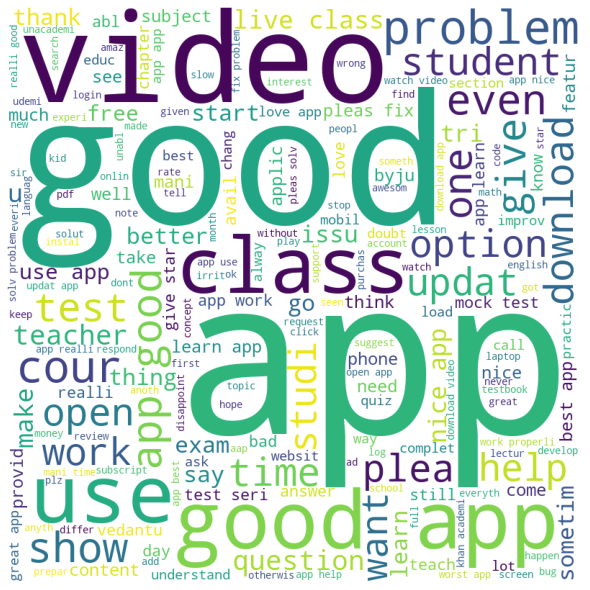

In [35]:
data = df
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [36]:
sample = df['content'][1]
print(sample)

testimonial = TextBlob(sample)
pola = testimonial.sentiment.polarity
subj = testimonial.sentiment.subjectivity
print('pola', pola, 'subj', subj)

come man normal kid develop app understand code app like make children total looser televis ad ridicul give children reason sit infornt phone tablet ridicul download app put review
pola 0.075 subj 0.7


In [37]:
def polarity(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity
    return polarity


def subjectivity(text):
    testimonial = TextBlob(text)
    subjectivity = testimonial.subjectivity
    return subjectivity


def senti(text, polarity_threshold=0.2):
    testimonial = TextBlob(text)
    senti = testimonial.sentiment.polarity
    
    if senti >= polarity_threshold:
        return 'Positive'
    elif np.abs(senti) < polarity_threshold:
        return 'Neutral'
    else:
        return 'Negative'
    

df['polarity'] = df['content'].apply(lambda x: polarity(x))
df['subjectivity'] = df['content'].apply(lambda x: subjectivity(x))
df['sentiment'] = df['content'].apply(lambda x: senti(x))
df.head()

,name,content,score,polarity,subjectivity,sentiment
0,WhiteHatJr,unhappi app see even one video app nowaday use...,1,0.300,0.900000,Positive
1,WhiteHatJr,come man normal kid develop app understand cod...,1,0.075,0.700000,Neutral
2,WhiteHatJr,app good code think organis make us fool said ...,1,0.500,0.733333,Positive
3,WhiteHatJr,app good code think organis make us fool said ...,1,0.500,0.733333,Positive
4,WhiteHatJr,good app app use laptop pc laptop pc download ...,1,0.700,0.600000,Positive


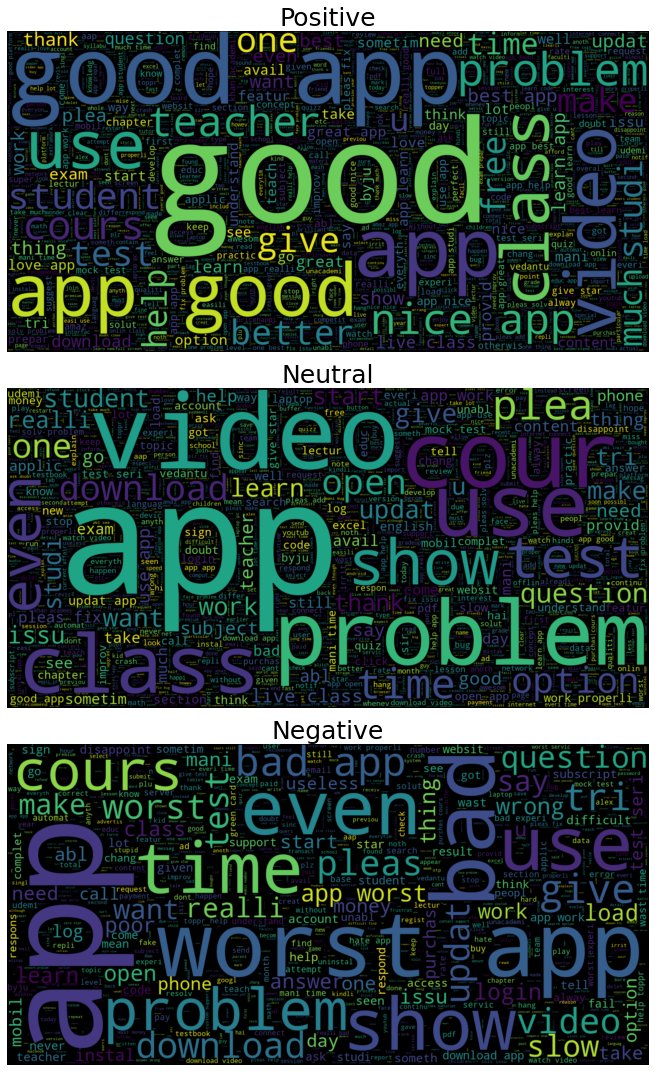

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
sentiments = df['sentiment'].unique()
for i, senti in enumerate(sentiments):
    senti_df = df.query('sentiment==@senti')
    cloud = ' '.join([tweet for tweet in senti_df['content']])
    wc = WordCloud(max_words=2000, width=1600, \
                   height=800, stopwords=stopwords).generate(cloud)

    ax[i].set_title(senti, fontsize=25)
    ax[i].axis('off')
    ax[i].imshow(wc , interpolation = 'bilinear')
    
plt.tight_layout()
plt.show()

# Vectorization

In [39]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['content'])

# Feature Selection

In [40]:
X = x.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Building

In [41]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [42]:
df

,name,content,score,polarity,subjectivity,sentiment
0,WhiteHatJr,unhappi app see even one video app nowaday use...,1,0.300,0.900000,Positive
1,WhiteHatJr,come man normal kid develop app understand cod...,1,0.075,0.700000,Neutral
2,WhiteHatJr,app good code think organis make us fool said ...,1,0.500,0.733333,Positive
3,WhiteHatJr,app good code think organis make us fool said ...,1,0.500,0.733333,Positive
4,WhiteHatJr,good app app use laptop pc laptop pc download ...,1,0.700,0.600000,Positive
...,...,...,...,...,...,...
13109,TestBook,good app,5,0.700,0.600000,Positive
13110,TestBook,good,5,0.700,0.600000,Positive
13111,TestBook,awesom app ssc exam prepar cgl may best app co...,5,1.000,0.300000,Positive
13112,TestBook,use practic,5,0.000,0.000000,Neutral


In [43]:
df['score'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
13109    5
13110    5
13111    5
13112    5
13113    5
Name: score, Length: 13114, dtype: int64>

In [44]:
y = df['score']

# Data Splitting

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

# Model Building 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_test, y_test)
lr_score = lr.score(x_test, y_test) * 100

In [48]:
print(lr_score)

68.62371330537552


In [49]:
evaluate(lr,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 713  172  798   29   38]
 [ 243  248 1113   67   74]
 [ 256  250 2499  203  266]
 [  53   75 1031  279  310]
 [  32   42  740  248  712]]
ACCURACY SCORE:
0.4243
CLASSIFICATION REPORT:
                     1            2            3            4            5  \
precision     0.549730     0.315121     0.404304     0.337772     0.508571   
recall        0.407429     0.142120     0.719344     0.159611     0.401353   
f1-score      0.468001     0.195893     0.517659     0.216783     0.448645   
support    1750.000000  1745.000000  3474.000000  1748.000000  1774.000000   

           accuracy     macro avg  weighted avg  
precision  0.424268      0.423100      0.420274  
recall     0.424268      0.365971      0.424268  
f1-score   0.424268      0.369396      0.394054  
support    0.424268  10491.000000  10491.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[328  17  96   1   8]
 [ 40 239 146  14  16]
 [ 19  14 751  20  36]
 [ 13  16 164 217  42]
 [  3   

# SVM

In [50]:
from sklearn import svm
sv = svm.SVC()
sv.fit(x_test, y_test)
svm_score = sv.score(x_test, y_test) * 100

In [51]:
print(svm_score)

86.58025162028213


In [52]:
evaluate(sv,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 556   64 1103    5   22]
 [ 153  171 1338   25   58]
 [ 126   62 2993   83  210]
 [  27   18 1269  174  260]
 [  16   12 1017  128  601]]
ACCURACY SCORE:
0.4285
CLASSIFICATION REPORT:
                     1            2            3            4            5  \
precision     0.633257     0.522936     0.387694     0.419277     0.522155   
recall        0.317714     0.097994     0.861543     0.099542     0.338782   
f1-score      0.423135     0.165058     0.534751     0.160888     0.410940   
support    1750.000000  1745.000000  3474.000000  1748.000000  1774.000000   

           accuracy     macro avg  weighted avg  
precision  0.428462      0.497064      0.479151  
recall     0.428462      0.343115      0.428462  
f1-score   0.428462      0.338954      0.371411  
support    0.428462  10491.000000  10491.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[405   2  36   0   7]
 [  7 376  58   5   9]
 [  5   0 809   7  19]
 [  3   2  85 335  27]
 [  1   

# KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_test, y_test)
neigh_score = neigh.score(x_test, y_test) * 100

In [54]:
print(neigh_score)

59.81700343118567


In [55]:
evaluate(neigh,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 637   82  532   54  445]
 [ 422  177  589   40  517]
 [ 875  286 1295  124  894]
 [ 394  145  593  123  493]
 [ 355  163  643   93  520]]
ACCURACY SCORE:
0.2623
CLASSIFICATION REPORT:
                     1            2            3            4            5  \
precision     0.237421     0.207503     0.354600     0.283410     0.181248   
recall        0.364000     0.101433     0.372769     0.070366     0.293123   
f1-score      0.287390     0.136259     0.363458     0.112741     0.223993   
support    1750.000000  1745.000000  3474.000000  1748.000000  1774.000000   

           accuracy     macro avg  weighted avg  
precision   0.26232      0.252836      0.269411  
recall      0.26232      0.240338      0.262320  
f1-score    0.26232      0.224768      0.247621  
support     0.26232  10491.000000  10491.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   6  16   2  63]
 [ 93 296  16   2  48]
 [130  64 545   4  97]
 [ 61  39 122 169  61]
 [ 54  2

# Naïve Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_score = gnb.score(x_test, y_test) * 100

In [57]:
evaluate(gnb,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 762  237    0  624  127]
 [   0  901    0  769   75]
 [  74  307 1077 1781  235]
 [   0    1    0 1742    5]
 [   0    5    0  891  878]]
ACCURACY SCORE:
0.5109
CLASSIFICATION REPORT:
                     1            2            3            4            5  \
precision     0.911483     0.620951     1.000000     0.299983     0.665152   
recall        0.435429     0.516332     0.310017     0.996568     0.494927   
f1-score      0.589327     0.563830     0.473303     0.461152     0.567550   
support    1750.000000  1745.000000  3474.000000  1748.000000  1774.000000   

           accuracy     macro avg  weighted avg  
precision  0.510914      0.699514      0.748928  
recall     0.510914      0.550654      0.510914  
f1-score   0.510914      0.531032      0.521627  
support    0.510914  10491.000000  10491.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 93  70  39 209  39]
 [ 24 113  25 257  36]
 [ 34  87 141 484  94]
 [ 17  32  20 347  36]
 [ 17  1

# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test) * 100

In [59]:
print(clf_score)

32.02439954250858


In [60]:
evaluate(clf,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[   0    0 1750    0    0]
 [   0    0 1745    0    0]
 [   0    0 3474    0    0]
 [   0    0 1748    0    0]
 [   0    0 1774    0    0]]
ACCURACY SCORE:
0.3311
CLASSIFICATION REPORT:
                1       2            3       4       5  accuracy  \
precision     0.0     0.0     0.331141     0.0     0.0  0.331141   
recall        0.0     0.0     1.000000     0.0     0.0  0.331141   
f1-score      0.0     0.0     0.497530     0.0     0.0  0.331141   
support    1750.0  1745.0  3474.000000  1748.0  1774.0  0.331141   

              macro avg  weighted avg  
precision      0.066228      0.109654  
recall         0.200000      0.331141  
f1-score       0.099506      0.164752  
support    10491.000000  10491.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  0   0 450   0   0]
 [  0   0 455   0   0]
 [  0   0 840   0   0]
 [  0   0 452   0   0]
 [  0   0 426   0   0]]
ACCURACY SCORE:
0.3202
CLASSIFICATION REPORT:
               1      2           3   

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
dt_score = DT.score(x_test, y_test) * 100

In [ ]:
evaluate(DT,x_train, x_test, y_train, y_test)

# Accuracy comparison

In [ ]:
scores = [lr_score,svm_score,neigh_score,gnb_score,clf_score,dt_score]

In [ ]:
Model = ('Logistic Regression','SVM','KNeighbors Classifier','Naïve Bayes','Random Forest Classifier','Decision Tree Classifier')
y_pos = np.arange(len(Model))
print(y_pos)
print(scores)

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, scores, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, Model)
plt2.xlabel('Score')
plt2.title('Accuracy comparison')
plt2.show()